In [1]:
#Rag audio and video project
!pip install -q -U google-generativeai
# # This command installs the google-generativeai library.
# -q: Suppresses unnecessary output during the installation.
# -U: Ensures the latest version of the library is installed (it upgrades the package if an older version is already installed).

In [2]:
# simply taking the api key,
import google.generativeai as genai
from google.colab import userdata

genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

In [3]:
list(genai.list_models())
# gives the complete list of all the google models

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
      

In [4]:
# in here we are selecting a model for our textual embedding, by giving it out some texts, then we tell it that
from typing import Dict

result : Dict = genai.embed_content(
    model="models/text-embedding-004",
    content=[
        "What is the meaning of life?",
        "How much wood would a woodchuck chuck?",
        "How does the brain work?",
    ],
    task_type="retrieval_document",  #task_type="retrieval_document": Indicates the type of task. Here, embeddings are being generated for document retrieval.In this case, the task_type="retrieval_document" ensures that the embeddings are optimized for document retrieval tasks rather than other possible tasks, such as:
# Classification: Optimized for labeling categories (e.g., spam detection).
# Clustering: Optimized for grouping similar items.
# Search or Ranking: Optimized for matching queries with results.
# By explicitly specifying retrieval_document, the model fine-tunes the embeddings to capture relationships that are most useful for finding and retrieving relevant documents.
    title="Embedding of list of strings", #The title parameter is metadata—additional information describing the embedding task.
)

# A list of inputs > A list of vectors output
for v in result["embedding"]:
    print(str(v)[:50], "... TRIMMED ...", len(v))

[-0.036453027, 0.033254996, -0.03970925, -0.002628 ... TRIMMED ... 768
[-0.01591948, 0.032582663, -0.081024624, -0.011298 ... TRIMMED ... 768
[0.00037063024, 0.03763057, -0.122695684, -0.00951 ... TRIMMED ... 768


#First Part: (ABOVE)

Embedding Generation: Uses Google Generative AI API to generate text embeddings (vectors).

#Second Part: ##(BELOW)

Vector Database: Embeddings are stored in Chroma DB, a vector database designed for efficient storage and retrieval of embeddings.

In [5]:
!pip install -Uq langchain-chroma
# database that lcoally install the vectors, we can use pinecone also but its online and is cloud based, this isntall the cectors at your lcoal machinne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.1 MB/s eta 0:00:00


In [6]:
import getpass #  getpass Module:
# Purpose: This module is used to securely handle and prompt the user for sensitive information, like passwords, without showing the input in the console or terminal.
# Common Use: It's typically used when you need to collect passwords, API keys, or other sensitive data in a secure way (i.e., without displaying the typed characters)
import os

In [7]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Dogs are great companions, known for their loyalty and friendliness.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Cats are independent pets that often enjoy their own space.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Goldfish are popular pets for beginners, requiring relatively simple care.",
        metadata={"source": "fish-pets-doc"},
    ),
    Document(
        page_content="Parrots are intelligent birds capable of mimicking human speech.",
        metadata={"source": "bird-pets-doc"},
    ),
    Document(
        page_content="Rabbits are social animals that need plenty of space to hop around.",
        metadata={"source": "mammal-pets-doc"},
    ),
]

In [8]:
!pip install -Uq langchain-google-genai
from langchain_google_genai import GoogleGenerativeAIEmbeddings # langchain-google-genai: This is a wrapper for LangChain that integrates the Google Generative AI API into LangChain’s framework.

embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004",
                                          google_api_key=userdata.get('GOOGLE_API_KEY')) #LangChain might not automatically inherit the API key: The LangChain wrapper (the GoogleGenerativeAIEmbeddings


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.9 MB/s eta 0:00:00


In [9]:
embeddings.embed_query("What's our Q1 revenue?") #this is making the embedding for the words i have written under

[0.040674030780792236,
 0.006255019456148148,
 -0.013568978756666183,
 -0.0003686861018650234,
 0.04303165152668953,
 0.04935013875365257,
 -0.013514830730855465,
 -0.027903610840439796,
 -0.03995805233716965,
 -0.006844368763267994,
 0.0013024156214669347,
 -0.009539234451949596,
 0.0705987736582756,
 -0.009862210601568222,
 0.03167127072811127,
 -0.02663198858499527,
 -0.018167555332183838,
 -0.005245935637503862,
 -0.14866198599338531,
 -0.01596848852932453,
 0.02811194583773613,
 -0.0018506837077438831,
 -0.025303209200501442,
 -0.01434125192463398,
 -0.03104301728308201,
 -0.07088255137205124,
 0.011673162691295147,
 0.008746510371565819,
 0.003015926806256175,
 -0.010475549846887589,
 -6.184780795592815e-05,
 -0.0014338439796119928,
 -0.03641575202345848,
 -0.0519932359457016,
 -0.02123081497848034,
 0.03613690286874771,
 -0.03694721683859825,
 0.06530386954545975,
 0.031148776412010193,
 -0.05865824222564697,
 -0.033094197511672974,
 -0.002400598954409361,
 -0.039360735565423965

In [10]:
from langchain_chroma import Chroma
# from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(
    documents,                         #ismain hum documents jo ooper humne diye hain oski emdedding vector kerke hum store kerre hain apnay vector database joky chroma hai
    embedding=embeddings) #humne isko yeh iss wajah se kerra hai ke agr hum isko vector database main store na kerte toh humain saray kaam khud kerne partay mtlb. cosine similarity waghera

In [11]:
list(dir(vectorstore)) #When you run list(dir(vectorstore)), it will return all the attributes and methods available for the vectorstore

['_Chroma__ensure_collection',
 '_Chroma__query_collection',
 '_LANGCHAIN_DEFAULT_COLLECTION_NAME',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_asimilarity_search_with_relevance_scores',
 '_chroma_collection',
 '_client',
 '_client_settings',
 '_collection',
 '_collection_metadata',
 '_collection_name',
 '_cosine_relevance_score_fn',
 '_embedding_function',
 '_euclidean_relevance_score_fn',
 '_get_retriever_tags',
 '_max_inner_product_relevance_score_fn',
 '_persist_directory',
 '_select_relevance_score_fn',
 '_similarity_search_with_relevance_scores',
 'aadd_documents',
 'aa

In [12]:
vectorstore #The vectorstore object refers to a vector database that stores the embeddings (vectors) generated by your embedding model.

In [13]:
vectorstore.similarity_search("cat") #similarity check kerra hai, cat word ki

[Document(id='eb0b2862-61af-470d-bc93-07a37dae338d', metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
 Document(id='a51324b7-7c1c-499e-98b4-8ef5030f069a', metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
 Document(id='461b99e1-f79e-4ead-9667-0690d23e6b22', metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'),
 Document(id='79314213-92e2-4099-8353-718907a22530', metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.')]

In [14]:
await vectorstore.asimilarity_search("cat") #same cheez kerega, ooper walay search ki trhan

[Document(id='eb0b2862-61af-470d-bc93-07a37dae338d', metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
 Document(id='a51324b7-7c1c-499e-98b4-8ef5030f069a', metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
 Document(id='461b99e1-f79e-4ead-9667-0690d23e6b22', metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'),
 Document(id='79314213-92e2-4099-8353-718907a22530', metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.')]

In [15]:
# Note that providers implement different scores; Chroma here
# returns a distance metric that should vary inversely with
# similarity.

vectorstore.similarity_search_with_score("cat")

[(Document(id='eb0b2862-61af-470d-bc93-07a37dae338d', metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
  0.6688324213027954),
 (Document(id='a51324b7-7c1c-499e-98b4-8ef5030f069a', metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
  0.9940857887268066),
 (Document(id='461b99e1-f79e-4ead-9667-0690d23e6b22', metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'),
  1.103921890258789),
 (Document(id='79314213-92e2-4099-8353-718907a22530', metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.'),
  1.1072404384613037)]

In [16]:
embedding = embeddings.embed_query("cat")# convert cat into vector

vectorstore.similarity_search_by_vector(embedding) #and search here

[Document(id='eb0b2862-61af-470d-bc93-07a37dae338d', metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
 Document(id='a51324b7-7c1c-499e-98b4-8ef5030f069a', metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
 Document(id='461b99e1-f79e-4ead-9667-0690d23e6b22', metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'),
 Document(id='79314213-92e2-4099-8353-718907a22530', metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.')]

In [17]:
embedding

[-0.014495342038571835,
 -0.004356286954134703,
 0.030960695818066597,
 -0.01937987469136715,
 0.046561747789382935,
 0.07971760630607605,
 0.044616784900426865,
 -0.019115572795271873,
 0.08993305265903473,
 0.05842595174908638,
 -0.0453537255525589,
 0.018237140029668808,
 0.08033973723649979,
 0.02752574160695076,
 -0.028318511322140694,
 -0.02716362290084362,
 0.006191493012011051,
 0.005197346676141024,
 -0.01692069135606289,
 0.03503800556063652,
 0.08894353359937668,
 -0.010495638474822044,
 0.04114319011569023,
 -0.01638908125460148,
 -0.03600003570318222,
 0.01174926944077015,
 0.03139335289597511,
 0.03141077607870102,
 -0.0031625358387827873,
 -0.016714120283722878,
 0.042587678879499435,
 0.04249170795083046,
 0.01343710720539093,
 0.02279532328248024,
 0.0567803755402565,
 -0.01019603107124567,
 -0.014729867689311504,
 0.06853161752223969,
 -0.008628561161458492,
 -0.022934652864933014,
 -0.03452526405453682,
 0.01392278727144003,
 -0.022488689050078392,
 0.021314928308129

# Retrievers

In [18]:
from langchain_core.documents import Document
from langchain_core.runnables import RunnableLambda
# Here, the RunnableLambda wraps the vectorstore.similarity_search function, making it reusable and easily configurable.
retriever = RunnableLambda(vectorstore.similarity_search).bind(k=1)  # select top result (pehle saray result ara tha, lekin ab top result dega sirf)

retriever.batch(["cat"])

[[Document(id='eb0b2862-61af-470d-bc93-07a37dae338d', metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.')]]

In [19]:
from langchain_google_genai import ChatGoogleGenerativeAI
#yahan humary llm yeh jo hum use kerre hain yeh koi sa bhi ho skta hai iska koi lena dena nahi hai apnay embedding model se, btw embedding model apna ready hogya hai ooper


llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                             api_key = userdata.get('GOOGLE_API_KEY')
)

ab neechay ab augment wala kaam kerre hain

In [20]:
from langchain_core.prompts import ChatPromptTemplate #Purpose: Helps create structured and reusable templates for conversational AI models.
from langchain_core.runnables import RunnablePassthrough

#humne llm ko restrict kerdia hai, aur kuch nahi dena
message = """
Answer this question using the provided context only.

{question}

Context:
{context}
"""

In [21]:
prompt = ChatPromptTemplate.from_messages([("human", message)])

#RAG

In [22]:
rag_chain = {"context": retriever, "question": RunnablePassthrough()} | prompt | llm
           #line 35 per hai yeh^            #ooper wali line main humne runnable passthorugh bnaya hai jiske meaning hai directly apna question le aega |#ooper wala code le aega line 39 wala
#yeh humne pehle osse PIPELINE bna ker dedi hai ke RAG ko kaam kis tareeqay se kerna hai


# rag_chain = {"context": retriever, "question": RunnablePassthrough()} | prompt | llm
             #this is is Retrieval    #this part is augment              #this part is generation


In [23]:
response = rag_chain.invoke("tell me about shark")

print(response.content)

domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_content_requests"
}
metadata {
  key: "quota_location"
  value: "us-east1"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "0"
}
metadata {
  key: "consumer"
  value: "projects/293534312090"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quotas/help/request_increase"
}
].


ResourceExhausted: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateContent request limit per minute for a region' of service 'generativelanguage.googleapis.com' for consumer 'project_number:293534312090'. [reason: "RATE_LIMIT_EXCEEDED"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_content_requests"
}
metadata {
  key: "quota_location"
  value: "us-east1"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "0"
}
metadata {
  key: "consumer"
  value: "projects/293534312090"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quotas/help/request_increase"
}
]

#FACE DETECTION WITH EMBEDDING

In [ ]:
!pip install --upgrade torch==2.5.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [24]:
!pip install -Uq facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.2.2 which is incompatible.


In [25]:
!pip install -Uq pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.1.0 which is incompatible.


In [26]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

In [27]:
from facenet_pytorch import MTCNN, InceptionResnetV1

model = InceptionResnetV1(pretrained='vggface2').eval() #pretrain model ka architecture ajaega
model

  0%|          | 0.00/107M [00:00<?, ?B/s]

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [28]:
# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)# ebedding important line
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None

In [29]:
!mkdir images

In [30]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import requests
import os

def save_image_from_url(image_url, image_name):
  """
  Downloads an image from a URL and saves it to the 'images' folder.

  Args:
    image_url: The URL of the image to download.
    image_name: The name of the file to save the image as.
  """
  try:
    if not os.path.exists("images"):
      os.makedirs("images")

    image_path = os.path.join("images", image_name)

    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(image_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

    print(f"Image saved to: {image_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")


In [31]:
save_image_from_url("https://media.licdn.com/dms/image/v2/D4E03AQEEn9DuNlQwvw/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1664654245747?e=2147483647&v=beta&t=NGB0a9aqsgdyxpbuO3rqws95ogJnL_6aRtBDS7IWPfw","s1.jpg")
save_image_from_url("https://avatars.githubusercontent.com/u/10209765?v=4", "q1.jpg")

save_image_from_url("https://media.licdn.com/dms/image/v2/D4D22AQFmuEiR8ttUmw/feedshare-shrink_800/feedshare-shrink_800/0/1711203894556?e=2147483647&v=beta&t=GEZGp_cdogNJCJIGidoEw_DjW2FXZcG4nUUlaNF1Zlc","z1.jpg")
save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBBiqefc7Le97Rn0udVVBkur7RlU53FcQh1A&s",'z2.jpg')
save_image_from_url("https://scontent.fkhi4-4.fna.fbcdn.net/v/t39.30808-6/468785380_10160566910882765_300507882801991935_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=6ee11a&_nc_eui2=AeEk77SJKagGymTo3ibNnnx9YsjCm8DJ0lRiyMKbwMnSVMJqs7YWsJDuzKzXyLHLoFk&_nc_ohc=QJMm9K-AE4QQ7kNvgFE0N2o&_nc_oc=Adi1r8eogMcuDIMMLJvliCOnaaXQ2KnUbbJvY94aAnfInkDB-fyB_1ZXBpDQnWTkZnY&_nc_zt=23&_nc_ht=scontent.fkhi4-4.fna&_nc_gid=AcSynbwc6ukNTxWnUzjhtEe&oh=00_AYCvnF-vj63T-X69PZgBk6JvVjepzybVukgHPSM_6BXkGQ&oe=678003A4",'s2.jpg')
save_image_from_url("https://i.ytimg.com/vi/7QD3GKvSyMk/hqdefault.jpg?sqp=-oaymwEmCOADEOgC8quKqQMa8AEB-AHOBYAC0AWKAgwIABABGGUgXChPMA8=&rs=AOn4CLB2EaZsLrClGHqUMUhApQ_sxAcF7Q","q2.jpg")

Image saved to: images/s1.jpg
Image saved to: images/q1.jpg
Image saved to: images/z1.jpg
Image saved to: images/z2.jpg
Error downloading image: 403 Client Error: Forbidden for url: https://scontent.fkhi4-4.fna.fbcdn.net/v/t39.30808-6/468785380_10160566910882765_300507882801991935_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=6ee11a&_nc_eui2=AeEk77SJKagGymTo3ibNnnx9YsjCm8DJ0lRiyMKbwMnSVMJqs7YWsJDuzKzXyLHLoFk&_nc_ohc=QJMm9K-AE4QQ7kNvgFE0N2o&_nc_oc=Adi1r8eogMcuDIMMLJvliCOnaaXQ2KnUbbJvY94aAnfInkDB-fyB_1ZXBpDQnWTkZnY&_nc_zt=23&_nc_ht=scontent.fkhi4-4.fna&_nc_gid=AcSynbwc6ukNTxWnUzjhtEe&oh=00_AYCvnF-vj63T-X69PZgBk6JvVjepzybVukgHPSM_6BXkGQ&oe=678003A4
Image saved to: images/q2.jpg


Error downloading image: No connection adapters were found for ''

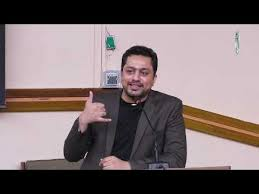

In [32]:
save_image_from_url("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxIQEhUSEhIVFRUQFhAVFhcWFRUVFxYQFRUXFhYWFxYYHSggGBolHhcVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0dHx0tLSstLSstLS0rKy0rLS0tLSstLS0rLS0tLS0tLS0tKy0tLS0tLS03Li03OCsrLSsrK//AABEIAMIBAwMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAAAQIDBAUHBgj/xABJEAABAwEDBgoECgkFAQEAAAABAAIDEQQhMQUGEkFRkRMiUmFxgZKhsdEyU3LSBxYkM0JDVLLB8BQVFzRzgpPC4SNEYqLxo2P/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/xAAhEQEBAAICAQUBAQAAAAAAAAAAAQIRAxIxEyFBUWEEIv/aAAwDAQACEQMRAD8A4aiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICldIzCYP0k3D5t/i1dQhibyRuCNTHb5nRfUccTeSNwV9sLeSNwRelfKqL6u4FvJbuCkQt5LdwQ6PlBF9YcA3kt3BOAbyW7gh1fJ6L6w4FvJbuCngW8lu4IdXyci+seBbyW7gqXxNp6LcRqG0IdHygi+rZIm3cVuI1DYqImtJcC1tzjqGGr8dyHR8qovq/gW8lu4IYW8lu4IdK+UEX1dwLeS3cE4FvJbuCHR8oovq3gW8lu4JwLeS3cEOj5SRfV3BN5LdwTgm8lu4IdHyii+rTC3kt3BRwLeS3cEOj5TRfVnAt5LdwTgW8lu4IdHymi+rOBbyW7gnAt5LdwQ6PlNF9WcC3kt3BQ6Ng+i2/mCHR8qIvqvgW8lu4KDC3kt3BDo+VUX1TwLeSNwRDo5BmD+9H+G77zV1GBcvzAHyo80b/vNXUYVb5aw8MuNZDQrEavhGlSrAVKkFBUiIiUREUQVEuHW3xCrVEmHWPFFimXV7X9rl57K2XGWeWhrpCuqoLSXNobxfpAn/1egmxb7Z+49c8zni+USmtSCCG6yHG8Dnqa02V2LWLz/wBfJnx8e8PL31htYlYHjBwBGq4gHC/btWSvOZmz6UAaQQYy4EEU+kSPzzL0SldeLK54TK/IVC1+VsvWay/PzNYTg3Fx59EX0Wphz+sDruGoedrh1qOm3pkWPYbdFO3Tie17drSDfz7FkICKVCCCoVShASilEFKKpEELXWo/KIRU31FKGhJNam7UGml62NFjW2McR/0g9u6oH9yMcnhkIpIUURtCKaKEHG8wB8qP8N33mLqkIXLvg9/ej/Cf95q6lCrfLOHhlMVwKhqutUaVBS1QpagrVKqUFBAVShSiewqJMOsKuipk/EIsW5sY/b/setXbclwyvcZC7jEggPc2uOppxp3Laz4x+2fuPURx8YkbfPzQYeS8lR2duiwUqak6ycLzruAHUvP5/Z2foTOCiNJ3gEGgOhGTTSvuqaGgXsSuN5wt/SMrysdQhr4mj2WxsqN+kifkeXlgtVpJkIfIXYuxJPPrKsyWGYCronAC4nRIXb7HYWUuAbW/ACqqnyYHDUVz711nBL8uF2a1yQuDmvc28XglpFMDcu1Zj51i3NMbq8LE0Em6j24Fwpga0r0rzuceSIeDfWNtQDq1rSfBc4syg1oOMU7XbCLneLQtY5bc8sOlm3ZioVSLQpREQEREBERAVl7eODStxHRe03jWKDfRXkRLNwCgqURVKKpEHG/g9/enfwn/AHmrqUK5b8H/AO9H+G/7zV1KFW+WcPDLarrVaYrwCjSVWFFFUECiUUojKEopRAoqJNXSFWqXjDpCNLc1xZ7Xi1w/HvVJtUbSQXC49PgreUsB0nwWgtmUxZw0mMEOB41G10tIjRvGy/oaRrWscZfLOWWnpTbIzSjxf0rmULWtntloIvdPIwOcK0YKGoGw1/6r0Nmy2JzRsejQNq7ig1qLqADUHHG6it2WBmlI15FHOce9Tkkkb4P9X3aqzZzPaRouZK2oBAaWuBOokraZXzi0CGCE6bgCG6VO9XI8nQNc1ofXSdW80FRsGtY+U8lttMr2uLQaUbXX0EYG9c3q61gyW7hOLJHo6WI0g6/ZULT/AAa2F36zkNDowxzX87nMa0dYLty3LsjCAuLjVx1VNB0BZ/we2V7XzyUGjOSa/Sqw6LR0en3KY33sc+XG2Tb21EVShdHBSUoqlCCFKUSiCKKFUoIQQimiUQQimiUQQimiIOOfB8PlR/hu+81dThZzLh1ktD4ySxxaaUqCQaEjYskZZtA+uk7bvNTky6045uO6MYrzWFcJblu0evk7bvNVDLc/r5O27zXL1fx09P8AXdwxTorhX65n9c/tu81DsrzH6156Xv8ANPW/D0/13bRKaC4QcqS+sdvcqTlGT1jt5T1vw9P9d50U0VwF9uk1vcesqgWp+oneU9X8PT/X0CRzq3I4XXjHaFwM2mQ0Gk6gwFTQLZW2wcHZoLQ17iZdIPacGuvoW81AtTO34PT/AF13KczQWVIoKl1+AupvvXkcs2YTFp0iODDhcGmpLq1qXDbSlFzqWcvFHXg6v/VjGxxcgbgumGdnw454y/Lpub+T2Mkq55po6J+bFQXMvFHnk7NatZXe2N72g8YgPadukDS/pqOpc4jgY01DACL601ra2eN7YRPiS8mn/wCYoKDm4pPWnJe0a4r1vs3bLLPIaSivB00SHjAip+jUH81VqC1uszyGxvOlTSJq4UqOMHVor/6zs9oo7hXxGlBoOxdz1BFFi5WytFEykby5x1k39Kz8PReSa23Ftme+pJreAOc7F7fN+xmGFocKON7gaXG+65cTlyrKS0hxbQgtINKFpB0hz1ovQ5O+Ee2sIEgjmaMSW6Dz/Mzig/yqY4/Lnycu3XUXksl/CBZJaCTShJ5Y0m19puA6QF6izWlkjdKN7Xt2tcHDeFtz2uFAEUoCgqVCCEREBERARQUQSiiqIOA5PiaSS+oaBU0rXEAYLbxRWTWXnt+a1QlaRdG1pOsONfBXY6bV5+fP33HXh9sdNy2OwjU/fJ7yuaNgP0Hb5PxctONHlK4A3ldy8tyrv2jZgWIfQdXoJ7tK9WqWXZ/8x+L1h0btO4qaD/l2Sp3z+jtGyjmsIF8JPPojzVX6TYvs/wD1b7y1gZzP7J8lPBHU2TsO8lN5neNmbXYvs1eljPNUm32Mf7VvZjWt4B/q5D/K7yU/orz9VJ2HeSv+/pe8bvJk1lmkbG2yMq7WWx0A1k3allZ35Oe5kMUMbiGlxo1twoBTC4YlY+aVhcJDIWuboinGBFSdlehe1MoAqRVevhtk3WMv9TTktoyVKwVfE9o20u3rE0F1a0zODbqX1xAuHRrXMrZHoSObUGjnXjA36l6Mbt5eTj6+7EcKAnmKyMhZxsbEIJ7gBxX0uofou8+ZWrRcxx5j4LQmIK5YyucyuN3G3yjZ4CeEjkjNKkgObU9VVS6KCJ1ZXh1Gg0YCeMQCG1GNxx5liZPyvPZg4QzyRiS5wYaaXSsRoDzQ1q41Os7ST03rMx0vqT6boScJx9HRbQBrdjdXX5q0H0uAxWWwXCmF1OhUTNAJOvDrWmd7WQ0krJs5fGdJjnMcMHNcWkdBCmNmiL8cVS9+rWbzzN1qj32ZWd80krLNPx+EqGPuDqgE8blVpSuPSugEL5/ssh4VrmkjRIoQaHqIwXsLDnPaosJnOGyTj9543evPy8047Nu3Hjco6gi8bZM+z9bB1xu/td5rdWTOiyS/Whh2SAsv9o8U9RTHmwy8VbhY26USMhwq0gg6wajeFJC6SopUkKUV2ilQqioTYiiKUTY8xZskRj6tvZCzosnRj6tnZC2fBBTwaahvbFZYo/Vs7IV9tkj5DeyFd0VIV1BbFmZyW7gqxA3kjcFcClE2tiIbB3KeCGwblWgQ2oMY2LByvlCOztbpelIQ1jdZcSL+YCt58wtl3c645l3Lf6TbxI01a17WR8zGnEDnNT1po37ugaVRpE1JrerT7SG68ML7qrT5Syg6KMm64EjoXO5c5Z5SeNo+ysad8uSY+XVcpSz8EXQtDydQe1p6q4rwGULLapJHSvgeLqmjSQABj3YrVxZWnH1z96uNyxO6oMr6UpStLjiLtS1I5Z545LFsk4h6h3rUkrMyi/igbT4LBBPWum3nUlbLI1nvLtgp1n/CwFvclspGOe/f/hQTBxNJvJvHsn/N3WFS6g4x/JU2vEOH0MfZOPmrcjtJ4AwF6Kuk7ecnoWO4kCpHpm/o1NFMVXb5NFtOUQOpW479teipI8Goq/k94bIxzxVtRpDaDiG9C9WbJA/0ZNE7H3X9Jp4rx5r+bz5Bb6CSrQa4gLwf2TWrp6v58vMZ0mRpBeAHDa0+dBuWHJC5hvBHT+CrjkLfRJb7JI7llx5UkwcQ4f8AIX06R5Lw7xen2rEstofGase5h2scW76Lc2TPG1R3Oc2QbHtoe02nfVYRtcLvTiLa/SYaivSKeCCxRP8Am5QeZ2P4HuXSZZTxTpK9TZM+oz87C9vOwh4r3Fbux5ess1AyZlTqcdA7nUr1Lms2SpW/RrztNe7HuWHJGRcR1EUO7Fdcf6c55c8uGfDs9FBC5LYsrzw3RyvaNlai7mNQtxY89rQz0wyQc40Hb23dy74/1YfPs53isdC0UXk2Z+x0vgfXmc099yLp6+H2nTJ6sBTRVIvQ4KaJRVKFFiFKIhRKIpCI8xn/AJZ/RrMWtP8AqWjSY3mZTju3ED+YLj0Fs4KQSUBLamhwvBGrpr1BbjPXLTrVaXuwbGTGwbGtJv6TivMTO2KsWttlXOV08bY6UIaA87XUvpzLzrH0J6lepQKwahwH+Uhct1tYG6Qqsizx4nnVuzGjVmWX0eklVGtyliBsBPf/AIWHgr2UJayOGyg3D/KsE05ykRUKnDEr0cdGt5mjwWhsLKvaOeu5be0uvDegnoGA/OxFinhbuc3npKxIyWXjXt1cyzHXLDdV1+oEjruQql79N7QTtK2TWnUd4Woaf9QU1C5bQSgXGpOwCqBKKXeC6hm3kSz2mxQOfG0nQoXC51WuIN46Fy/SBwrXYbvFdX+Dd9bCwcl8w3vLv7lmzbeN1WNa8yG/VSubzOo4LTWrNa0s+i142sNDuK6TRCFwy/nwvw6zOuO2myPbc5rmH/k0jvwWOWHYCF2aSFrrnAHpvWptmbFmkqeD0SdbTonuXG/y/VdJy/bmkNqewcV7m82I3FZrMsPIpI1kg3Hy7l6K2Zj64pT0OAI3rSWzNi1R4xh42sP4FccuDknxt1nLFoTWZ+LXRnaLx3V8FUMmtffHI1/Nge7yWqlicw0c1zabRRUh2u7wXKyzzG+2NbF2Sn8nvHmixW2yQXBz+px80WfY/wAuyqURfcfPRVFNEooIRToqkyNH0hvCgkq1apNFj3DFrXu6wCfwVq0ZSgZ6c0bfae0eJWJPl2yEOabTFxgQeOMCKIOCzPrft8Viucr9sjMbiwmugSK6iBcCOY4rCe5Vzqt192KiyxVNVtMlR8CySZwIfoaMIcCDwkh0XSDZoNDqHa5uyotWWLuQ0uNFyzIHAMrsqfxUWewvkroMLtEVNATQG4E7L16KyZkzyx8d7YwR7Rp3DvS2RrHG5eHPa1JOJcSVWxlLyvV5dzHnsw0ozwzRjQaLuzrHQvKuJrTWLiNYI1EKy7Zyxs8s7JLeM5x1D8+Cy2GpLtvhqWNZRRgHLJJ6MAFfdJRCLVsloqYh/p43aR0hsJFBvv3BWZ4HnVdtV+Bv+m9pxLoj4hIixYQC555NB+K2ULgBhRYsNhp17VlCz0Fw/PNsRUvJOzpN+6i6f8F5+RmuqWTwauVadLtx28xG1dW+DBvyMnlSyHcGj8FGsXrlClFGkKURRpCEKVCosz2djxRzQ7pAK0tszSssl4ZoHawkL0BChS4yrLY8Q/4PmEmkz+5F7dFj0sfpe1VqlzqL50/aNlT7W7+nF7ig/CJlQ/7t39OL3F124dnaM78tSQxgwu0TpX3A3U5+deJOWJbQA+SR1S1laEtGA1DaaleBtmd9tmFJJy7+WMeDVhxZctDRRshA6G+SzWrnNOivId6VXe0SfEqng28kblz/AOMFp9adzfJPjDafWnst8lNJ2dDawamjcFVpLnfxitXrT2WeSj4w2n1p7LfJOp2e7tlijlpptrTXeDvCsQZIhYQ4Rio2kkdNCV4v4w2r1p7LfJPjBafWnc3yTSbj0uUn8I/mbcPz+cFjxx0XmzlWbl9zfJP1tNy+5vkt7Tb3uRLY2IivpPc1pxuZdeNpr4BdKsTBQU0iNRfcekB146gvnqPLE7SHCQgtNQaNx3LZNz2ygMLS7sx+6sWbdsObrNO6PjxBNVrZ8hWeY1kiY47SBXfiuP8Ax6yj9pd2I/dUjPrKI/3J7EXuqdW7z434eqy9kkQyuYBdcR0LXgUFCAV5i2ZzWuZ2lJMXGlK6LBd1BWP11P6z/qw/gukrz2zb1tjsznuLGuDQGl3o1uBwxV205JZGKumIqKm4C5t41ryMWX7Q30XgVFPm48Oyq35y2p2MgPTHEfFq1MpGXrsnWKORpLZn3HDinxxHQsQS6ibxUdYJC823OS1BwcJKECgoyMXVrgG0V4Z223157EfuqXKLNNqRiNfjsK7LmNZxDYYATQuaZDW75xxfgeYhcF+N1t9eeyz3VBzstvrz2We6s7alj6WNoZy27wqHWyMYyM7TfNfNnxstnrz2We6hzstvrz2We6p7r2xfSByjD61naCpOVYB9Y3v8l84fGu2evPZZ7qHOu2evPZZ5J7r3xfRjcswFzWCS95DRxXXuPUtgvmSPOy2Nc1wnNWEOB0IzRwwIq1Z/7Rsqfa3f04vcVS5z4fRZUL51/aNlT7W7+nF7iftGyp9rd/Ti9xDu+ikXzr+0XKn2t39OL3EQ7vKoiI5iIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP/Z","q2.jpg")

In [33]:
# Example usage
image_path = "./images/q2.jpg"
q2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", q2.shape)
print("Image Embedding:", q2)

Image Embedding Shape: (512,)
Image Embedding: [ 0.00058278 -0.01463297 -0.10330155  0.03984535  0.08525636  0.08029363
 -0.01011138  0.04867227 -0.00259888 -0.0077198  -0.0331905   0.06225294
  0.01708761 -0.00982595 -0.01638006  0.00054205  0.04426373  0.00519726
  0.04448376 -0.08979201 -0.06033407 -0.00162232  0.09186839  0.03262272
  0.06873461  0.02532319  0.03512866 -0.05809444  0.00151727  0.05172818
 -0.04107905 -0.03755797 -0.04134395 -0.00761167 -0.00674731  0.04443471
  0.00570058 -0.02845279 -0.12002273  0.05528227  0.00132485  0.00437373
 -0.02495593  0.01842853 -0.00357915  0.01889837  0.02980521  0.10357354
 -0.11238679 -0.02633037  0.02794239 -0.0152881   0.04015452 -0.0039458
 -0.09202526  0.0715652  -0.03382103  0.07384298  0.01921727 -0.04263638
  0.02758526  0.03841295 -0.04435986 -0.05347932 -0.04511738  0.03700717
 -0.00194125 -0.00450149  0.03157888  0.02796174  0.02416223  0.01202647
 -0.00905218  0.00880154  0.0189873  -0.01363976 -0.0499587  -0.01557556
  0.0

In [36]:
image_path = "./images/s1.jpg"
cat2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", cat2.shape)
print("Image Embedding:", cat2)


Image Embedding Shape: (512,)
Image Embedding: [ 7.76378484e-03  1.38627877e-02  3.42880785e-02  5.59410453e-02
  4.43015993e-02  4.22530621e-02  3.66532840e-02  9.78047494e-03
 -1.34703349e-02  1.68228522e-02  8.26280266e-02  7.83666130e-03
  4.87103760e-02 -3.90704256e-03  1.06615685e-02 -7.18539953e-02
 -4.96409610e-02  1.04582205e-01  1.67736411e-02  2.15226728e-02
 -2.09242180e-02  8.07328224e-02  1.67470835e-02 -1.14253521e-01
 -4.25868072e-02 -2.27696840e-02 -1.50764631e-02 -4.02070023e-02
 -2.33913157e-02 -4.37326618e-02  7.05495998e-02  7.63667449e-02
  5.58592677e-02  1.28479674e-02  3.95264030e-02 -4.74360399e-02
  1.70672743e-03  1.20020993e-02 -4.78693005e-03 -1.22949760e-02
  1.39081292e-02 -2.78096441e-02  2.48735808e-02 -2.39850115e-03
 -1.18011301e-02  3.69508145e-03 -4.81235720e-02  1.29993325e-02
 -6.90511912e-02 -8.01179186e-02 -2.32403465e-02 -6.55335188e-02
  3.54257748e-02  5.77532388e-02  1.61157586e-02 -5.35045713e-02
  3.46317366e-02  4.95921448e-02 -6.5778270

In [57]:
q1 = create_image_embedding("./images/q1.jpg")
q2 = create_image_embedding("./images/q2.jpg")
q3 = create_image_embedding("./images/q3.jpg")
q4 = create_image_embedding("./images/q4.jpg")
s1 = create_image_embedding("./images/s1.jpg")
z1 = create_image_embedding("./images/z1.jpg")
z2 = create_image_embedding("./images/z2.jpg")

In [38]:
!pip install -U milvus-lite #yeh ek aur vector database hai, bss aesi kerlia hum kisi ki bhi kerlety hain

!pip install -U pymilvus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.69.0
    Uninstalling grpcio-1.69.0:
      Successfully uninstalled grpcio-1.69.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.3 which is incompatible.


In [39]:
from pymilvus import MilvusClient
client = MilvusClient("./milvus_demo.db")


In [55]:
from pymilvus import MilvusClient
import numpy as np

client = MilvusClient("./milvus_demo.db")
client.create_collection(
    collection_name="images",
    dimension=512  # The vectors we will use in this demo has 384 dimensions
)

In [58]:
data = [
    {"id": 1, "person_name": "Qasim", "vector": q1},
    {"id": 2, "person_name": "Qasim", "vector": q2},
    {"id": 3, "person_name": "mike o hearn", "vector": q3},
    {"id": 4, "person_name": "mike o hearnn", "vector": q4},
    {"id": 3, "person_name": "Shahzad", "vector": s1},
    {"id": 5, "person_name": "Zia Khan", "vector": z1},
    {"id": 6, "person_name": "Zia Khan", "vector": z2}
]


In [53]:
res = client.insert(
    collection_name="images",
    data=data
)

In [64]:
res = client.search(
    collection_name="images",
    data=[s1],
    limit=1,
    output_fields=["id", "person_name"],
)
print(res)


data: ["[{'id': 3, 'distance': 1.0, 'entity': {'person_name': 'Shahzad', 'id': 3}}]"] 


In [46]:
q3 = create_image_embedding('./images/q3.jpg')
q3


array([-2.28181425e-02, -9.12782028e-02, -7.24859759e-02,  4.09199074e-02,
        2.08642762e-02, -2.11638305e-02,  7.57042244e-02,  3.71956527e-02,
       -2.11881474e-02, -3.53625305e-02,  1.96012831e-03,  2.43316609e-02,
        4.32874858e-02, -1.30338110e-02,  1.00757135e-02, -2.36371588e-02,
       -3.09946965e-02,  6.42171875e-02, -4.66167070e-02, -1.96986292e-02,
       -1.04476005e-01,  4.13554832e-02,  7.77299097e-03, -9.41457674e-02,
       -6.16693310e-02,  7.16715958e-03, -4.28025909e-02, -6.25289902e-02,
       -3.88814392e-03, -4.47680466e-02,  5.22536971e-03,  4.50670160e-02,
       -3.86253884e-03, -1.56821162e-02,  8.39660689e-03,  4.03827708e-03,
       -6.02272199e-03,  7.67118623e-03, -1.43901244e-01,  3.24890502e-02,
       -3.49450149e-02,  5.33406101e-02,  4.45074812e-02, -6.62186369e-02,
        2.97807506e-03, -4.90045696e-02,  7.04029202e-02,  8.13547820e-02,
       -6.76121414e-02, -4.68713418e-02, -8.21815711e-03,  9.74218696e-02,
        5.51769547e-02, -

In [50]:
q4 = create_image_embedding('./images/q4.jpg')
q4


array([-5.55733442e-02, -5.72444405e-03, -3.21428590e-02,  4.54901569e-02,
        3.80656123e-02,  1.21296257e-01, -3.05971242e-02,  5.16034067e-02,
       -2.11088154e-02, -6.48726821e-02, -4.02750261e-02,  9.17612091e-02,
        7.36646308e-03,  2.49168882e-03, -9.27665364e-03,  4.66583073e-02,
        5.92025146e-02,  1.55120646e-03,  1.67714115e-02, -1.27209678e-01,
       -1.33256074e-02, -3.95093905e-03,  8.49130824e-02,  6.12336770e-02,
        9.20173079e-02, -1.19456602e-02,  3.13019566e-02,  1.30276186e-02,
       -2.27600187e-02,  4.65738922e-02, -3.14080566e-02, -4.75728661e-02,
       -2.32998356e-02, -2.51588598e-02,  1.55847045e-02,  9.42744166e-02,
        2.33697779e-02, -4.08550613e-02, -1.01212010e-01,  3.32756937e-02,
        4.82657552e-02,  1.94978677e-02,  4.99893725e-02, -6.54827058e-02,
        1.05131036e-02,  1.51001317e-02,  4.16937098e-02,  4.33719754e-02,
       -5.39007820e-02, -6.25770027e-03,  4.43269834e-02,  5.87067902e-02,
        5.49229756e-02, -

In [72]:
res = client.search(
    collection_name="images",
    data=[z1],
    limit=2,
    output_fields=["id", "person_name"],
)
print(res)

data: ["[{'id': 5, 'distance': 0.9999998211860657, 'entity': {'person_name': 'Zia Khan', 'id': 5}}]"] 
